In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [9]:
df = weekday_time_series(sensor_id='og_3_1H')

In [10]:
px.line(
    x=df.index, y=df.kw, 
    title='UV OG - 3rd Floor',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [11]:
time_int_range = np.arange(0, df.shape[0]*60, 60)
df['t'] = time_int_range
df['t_scaled'] = (df['t'] - df['t'].min()) / (df['t'].max() - df['t'].min())

In [12]:
px.line(
    x=df['t_scaled'], y=df.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

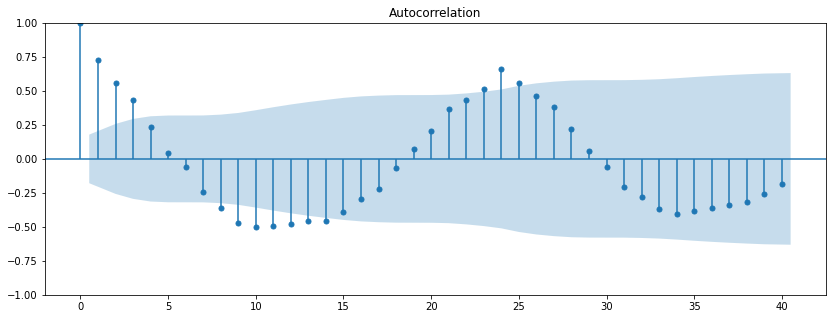

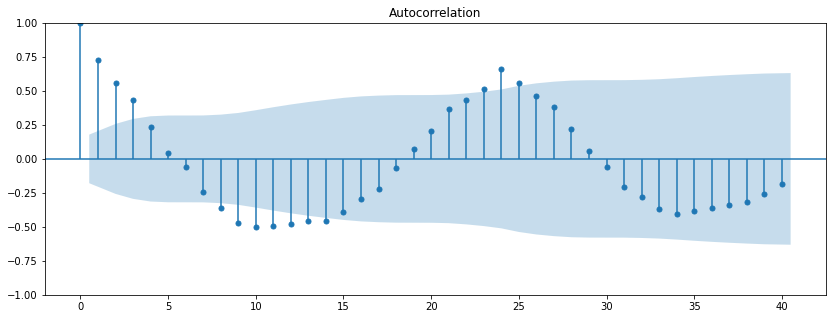

In [14]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(df.kw.values.squeeze(), lags=40, ax=ax)

In [15]:
# Short term periodicity interval
df['t_scaled'].iloc[9], df['t_scaled'].iloc[12]

(0.07563025210084033, 0.10084033613445378)

In [16]:
# Long term periodicity interval
df['t_scaled'].iloc[23], df['t_scaled'].iloc[26]

(0.19327731092436976, 0.2184873949579832)